In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
# import LazyRegressor

In [3]:
#loading training and testing data
Data_12month_booking = pd.read_csv('12month_flight_booking.csv')
Data_12month_revenue = pd.read_csv('12months_flight_revenue.csv')
Data_3month_booking = pd.read_csv('3months_flight_booking_prediction.csv')
Data_3month_revenue = pd.read_csv('3months_flight_revenue_prediction.csv')

In [20]:
Data_12month_booking.head()

,Unnamed: 0,Origin,Destination,Cabin,Booking Class,Booking Class Fare USD,Airline,Flight number,Class RDay Res Hold Total RDay: 331,Class RDay Res Hold Total RDay: 330,Class RDay Res Hold Total RDay: 329,Class RDay Res Hold Total RDay: 328,Class RDay Res Hold Total RDay: 327,Class RDay Res Hold Total RDay: 326,Class RDay Res Hold Total RDay: 325,Class RDay Res Hold Total RDay: 324,Class RDay Res Hold Total RDay: 323,Class RDay Res Hold Total RDay: 322,Class RDay Res Hold Total RDay: 321,Class RDay Res Hold Total RDay: 320,Class RDay Res Hold Total RDay: 319,Class RDay Res Hold Total RDay: 318,Class RDay Res Hold Total RDay: 317,Class RDay Res Hold Total RDay: 316,Class RDay Res Hold Total RDay: 315,Class RDay Res Hold Total RDay: 314,Class RDay Res Hold Total RDay: 313,Class RDay Res Hold Total RDay: 312,Class RDay Res Hold Total RDay: 311,Class RDay Res Hold Total RDay: 310,Class RDay Res Hold Total RDay: 309,Class RDay Res Hold Total RDay: 308,Class RDay Res Hold Total RDay: 307,Class RDay Res Hold Total RDay: 306,Class RDay Res Hold Total RDay: 305,Class RDay Res Hold Total RDay: 304,Class RDay Res Hold Total RDay: 303,Class RDay Res Hold Total RDay: 302,Class RDay Res Hold Total RDay: 301,Class RDay Res Hold Total RDay: 300,Class RDay Res Hold Total RDay: 299,Class RDay Res Hold Total RDay: 298,Class RDay Res Hold Total RDay: 297,Class RDay Res Hold Total RDay: 296,Class RDay Res Hold Total RDay: 295,Class RDay Res Hold Total RDay: 294,Class RDay Res Hold Total RDay: 293,Class RDay Res Hold Total RDay: 292,Class RDay Res Hold Total RDay: 291,Class RDay Res Hold Total RDay: 290,Class RDay Res Hold Total RDay: 289,Class RDay Res Hold Total RDay: 288,Class RDay Res Hold Total RDay: 287,Class RDay Res Hold Total RDay: 286,Class RDay Res Hold Total RDay: 285,Class RDay Res Hold Total RDay: 284,Class RDay Res Hold Total RDay: 283,Class RDay Res Hold Total RDay: 282,Class RDay Res Hold Total RDay: 281,Class RDay Res Hold Total RDay: 280,Class RDay Res Hold Total RDay: 279,Class RDay Res Hold Total RDay: 278,Class RDay Res Hold Total RDay: 277,Class RDay Res Hold Total RDay: 276,Class RDay Res Hold Total RDay: 275,Class RDay Res Hold Total RDay: 274,Class RDay Res Hold Total RDay: 273,Class RDay Res Hold Total RDay: 272,Class RDay Res Hold Total RDay: 271,Class RDay Res Hold Total RDay: 270,Class RDay Res Hold Total RDay: 269,Class RDay Res Hold Total RDay: 268,Class RDay Res Hold Total RDay: 267,Class RDay Res Hold Total RDay: 266,Class RDay Res Hold Total RDay: 265,Class RDay Res Hold Total RDay: 264,Class RDay Res Hold Total RDay: 263,Class RDay Res Hold Total RDay: 262,Class RDay Res Hold Total RDay: 261,Class RDay Res Hold Total RDay: 260,Class RDay Res Hold Total RDay: 259,Class RDay Res Hold Total RDay: 258,Class RDay Res Hold Total RDay: 257,Class RDay Res Hold Total RDay: 256,Class RDay Res Hold Total RDay: 255,Class RDay Res Hold Total RDay: 254,Class RDay Res Hold Total RDay: 253,Class RDay Res Hold Total RDay: 252,Class RDay Res Hold Total RDay: 251,Class RDay Res Hold Total RDay: 250,Class RDay Res Hold Total RDay: 249,Class RDay Res Hold Total RDay: 248,Class RDay Res Hold Total RDay: 247,Class RDay Res Hold Total RDay: 246,Class RDay Res Hold Total RDay: 245,Class RDay Res Hold Total RDay: 244,Class RDay Res Hold Total RDay: 243,Class RDay Res Hold Total RDay: 242,Class RDay Res Hold Total RDay: 241,Class RDay Res Hold Total RDay: 240,Class RDay Res Hold Total RDay: 239,Class RDay Res Hold Total RDay: 238,Class RDay Res Hold Total RDay: 237,Class RDay Res Hold Total RDay: 236,Class RDay Res Hold Total RDay: 235,Class RDay Res Hold Total RDay: 234,Class RDay Res Hold Total RDay: 233,Class RDay Res Hold Total RDay: 232,Class RDay Res Hold Total RDay: 231,Class RDay Res Hold Total RDay: 230,Class RDay Res Hold Total RDay: 229,Class RDay Res Hold Total RDay: 228,Class RDay Res Hold Total RDay: 227,Class RDay Res Hold Total RDay: 226,Class RDay Res Hold Total RDay: 225,Class RDay Res Hold Total RDay: 224,Class RDay Res H

In [7]:
pd.set_option('display.max_columns', None)
print(Data_12month_booking.columns)

Index(['Unnamed: 0', ' Origin', ' Destination', 'Cabin', 'Booking Class',
       ' Booking Class Fare USD ', 'Airline', 'Flight number', 'Dep_Date',
       'Dep_time',
       ...
       'Class RDay Res Hold Total RDay: 9',
       'Class RDay Res Hold Total RDay: 8',
       'Class RDay Res Hold Total RDay: 7',
       'Class RDay Res Hold Total RDay: 6',
       'Class RDay Res Hold Total RDay: 5',
       'Class RDay Res Hold Total RDay: 4',
       'Class RDay Res Hold Total RDay: 3',
       'Class RDay Res Hold Total RDay: 2',
       'Class RDay Res Hold Total RDay: 1',
       'Class RDay Res Hold Total RDay: 0'],
      dtype='object', length=376)


In [4]:
label_encoder = LabelEncoder()

# For 'Origin' and 'Destination' columns in Data_12month_booking
Data_12month_booking[' Origin'] = label_encoder.fit_transform(Data_12month_booking[' Origin'])
Data_12month_booking[' Destination'] = label_encoder.fit_transform(Data_12month_booking[' Destination'])

In [5]:
# For 'Cabin' column in Data_12month_booking
cabin_mapping = {'Y': 1}  # Map 'Y' to 1
Data_12month_booking['Cabin'] = Data_12month_booking['Cabin'].map(cabin_mapping)

In [6]:
Airline_map = {'AA':1}
Data_12month_booking['Airline'] = Data_12month_booking['Airline'].map(Airline_map)

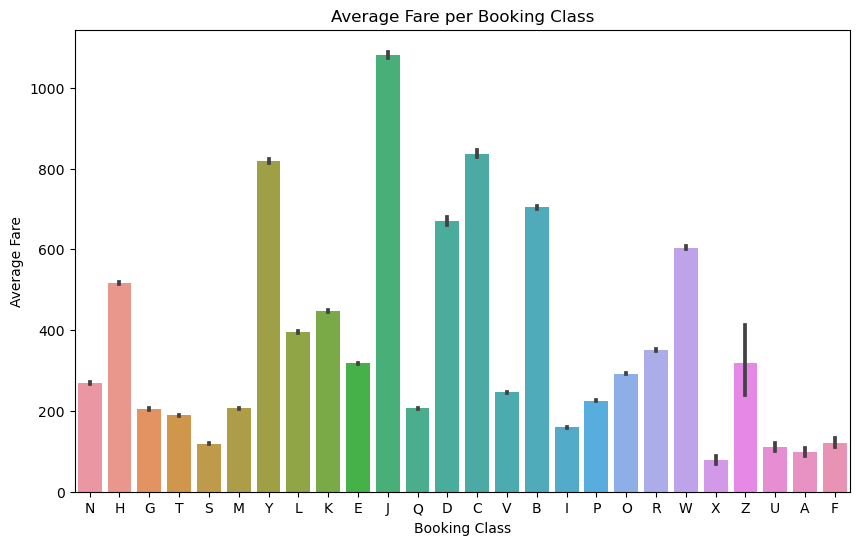

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Booking Class', y=' Booking Class Fare USD ', data=Data_12month_booking)
plt.title('Average Fare per Booking Class')
plt.xlabel('Booking Class')
plt.ylabel('Average Fare')
plt.show()

In [7]:
label_encoder = LabelEncoder()

# For 'Origin' and 'Destination' columns in Data_12month_booking
Data_3month_booking[' Origin'] = label_encoder.fit_transform(Data_3month_booking[' Origin'])
Data_3month_booking[' Destination'] = label_encoder.fit_transform(Data_3month_booking[' Destination'])

In [8]:
# For 'Cabin' column in Data_12month_booking
cabin_mapping = {'Y': 1}  # Map 'Y' to 1
Data_3month_booking['Cabin'] = Data_3month_booking['Cabin'].map(cabin_mapping)

In [9]:
Airline_map = {'AA':1}
Data_3month_booking['Airline'] = Data_3month_booking['Airline'].map(Airline_map)

In [10]:
label_encoder = LabelEncoder()
Data_12month_booking['Booking Class'] = label_encoder.fit_transform(Data_12month_booking['Booking Class'])


In [11]:
# Convert 'Dep_Date' to a numerical format (e.g., number of days since a specific date)
# Assuming the date is in the format 'YYYY-MM-DD'
Data_12month_booking['Dep_Date'] = pd.to_datetime(Data_12month_booking['Dep_Date'])
Data_12month_booking['Dep_Date_Numerical'] = (Data_12month_booking['Dep_Date'] - pd.to_datetime('2022-01-01')).dt.days

In [12]:
# Split 'Dep_Time' into hours and minutes
Data_12month_booking['Dep_Hour'] = Data_12month_booking['Dep_time'].str.split(':').str[0].astype(int)
Data_12month_booking['Dep_Minute'] = Data_12month_booking['Dep_time'].str.split(':').str[1].astype(int)


In [13]:
# Drop the original 'Dep_Date' and 'Dep_Time' columns
Data_12month_booking = Data_12month_booking.drop(['Dep_Date', 'Dep_time'], axis=1)


In [14]:
# Drop columns with all NaN values
Data_12month_booking.dropna(axis=1, how='all', inplace=True)
# Calculate the threshold for dropping columns
threshold = len(Data_12month_booking) * 0.05  # 5% threshold
Data_12month_booking.dropna(axis=1, thresh=threshold, inplace=True)
Data_12month_booking.fillna(0.00, inplace=True)

In [15]:
label_encoder = LabelEncoder()
Data_3month_booking['Booking Class'] = label_encoder.fit_transform(Data_3month_booking['Booking Class'])
Data_3month_booking['Dep_Date'] = pd.to_datetime(Data_3month_booking['Dep_Date'])
Data_3month_booking['Dep_Date_Numerical'] = (Data_3month_booking['Dep_Date'] - pd.to_datetime('2022-01-01')).dt.days

Data_3month_booking['Dep_Hour'] = Data_3month_booking['Dep_time'].str.split(':').str[0].astype(int)
Data_3month_booking['Dep_Minute'] = Data_3month_booking['Dep_time'].str.split(':').str[1].astype(int)
Data_3month_booking = Data_3month_booking.drop(['Dep_Date', 'Dep_time'], axis=1)

# Drop columns with all NaN values
Data_3month_booking.dropna(axis=1, how='all', inplace=True)
# Calculate the threshold for dropping columns
threshold = len(Data_3month_booking) * 0.05  # 5% threshold
Data_3month_booking.dropna(axis=1, thresh=threshold, inplace=True)
Data_3month_booking.fillna(0.00, inplace=True)


In [16]:
Features = [
    'Booking Class',
    'Dep_Date_Numerical', 'Dep_Hour', 'Dep_Minute'
]


for i in range(310):
    feature_name = f'Class RDay Res Hold Total RDay: {i}'
    Features.append(feature_name)

# Merge features into X_train
X_train = Data_12month_booking[Features]
y_train = Data_12month_booking[' Booking Class Fare USD ']  # Target for training

X_test = Data_3month_booking[Features]  # Features for testing
y_test = Data_3month_booking[' Booking Class Fare USD ']  # Target for testing

In [17]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
# from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import StackingRegressor, VotingRegressor
import statsmodels.api as sm

In [20]:
# Understanding the feature importance of various features using LinearRegression model
# we cannot get feature importance for LinearRegression model
# we have to use stats model for the data in order to get p values

#fittng the model using the training data
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

print(model.summary())

X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)

print("Predicted values for the test set are: ")
print(y_pred)

# 1. The coefficients tell you the estimated change in the target variable for a one-unit change in the corresponding feature.
# 2. The p-values (P>|t|) indicate the statistical significance of each feature. If the p-value is less than your 
# chosen significance level (e.g., 0.05), you can reject the null hypothesis that the coefficient is zero.
# 3. The confidence intervals show the range within which you can be reasonably confident that the true population parameter lies.

# For example, taking the 'Origin' feature:

# 1. Coefficient: 51.9524 - This suggests that, on average, an increase of one unit in 
# the 'Origin' is associated with an increase of 51.9524 in the target variable.
# 2. P-value: 0.000 - This is very small, indicating that 'Origin' is likely a statistically significant predictor.
# 3. Confidence Interval: (50.884, 53.021) - We can be reasonably confident that the true population parameter for 'Origin' lies within this range.

                               OLS Regression Results                               
Dep. Variable:      Booking Class Fare USD    R-squared:                       0.137
Model:                                  OLS   Adj. R-squared:                  0.135
Method:                       Least Squares   F-statistic:                     98.68
Date:                      Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                              13:15:51   Log-Likelihood:            -1.3924e+06
No. Observations:                    195774   AIC:                         2.785e+06
Df Residuals:                        195459   BIC:                         2.789e+06
Df Model:                               314                                         
Covariance Type:                  nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Extract feature importances and p-values
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance Mean': perm_importance.importances_mean,
    'Importance Std': perm_importance.importances_std,
    'p-value': perm_importance.p_values
})

print(feature_importances)

AttributeError: p_values

In [21]:
#Understanding the feature importance of various columns using Lasso
model = Lasso()

# Fit the model using the training data
# model1.fit(X_train, y_train)
model.fit(X_train, y_train)


# Make predictions using the test data
# predictions1 = model1.predict(X_test)
predictions = model.predict(X_test)


feature_importance = model.coef_


# Pairing each feature with its importance
feature_effects = dict(zip(Features, feature_importance))

# Display feature effects
for feature, effect in feature_effects.items():
    print(f"Feature: {feature}, Importance: {effect}")

Feature: Booking Class, Importance: 0.0
Feature: Dep_Date_Numerical, Importance: -9.450208355207419
Feature: Dep_Hour, Importance: 0.030836700479826566
Feature: Dep_Minute, Importance: 8.793938799807288
Feature: Class RDay Res Hold Total RDay: 0, Importance: -2.9986249550506154
Feature: Class RDay Res Hold Total RDay: 1, Importance: -4.254618746737653
Feature: Class RDay Res Hold Total RDay: 2, Importance: 2.5820194516913277
Feature: Class RDay Res Hold Total RDay: 3, Importance: -2.6902224437827402
Feature: Class RDay Res Hold Total RDay: 4, Importance: -0.6566327990884218
Feature: Class RDay Res Hold Total RDay: 5, Importance: -0.0
Feature: Class RDay Res Hold Total RDay: 6, Importance: -0.543433321038011
Feature: Class RDay Res Hold Total RDay: 7, Importance: -0.0
Feature: Class RDay Res Hold Total RDay: 8, Importance: -0.0
Feature: Class RDay Res Hold Total RDay: 9, Importance: 0.0
Feature: Class RDay Res Hold Total RDay: 10, Importance: 0.0
Feature: Class RDay Res Hold Total RDay:

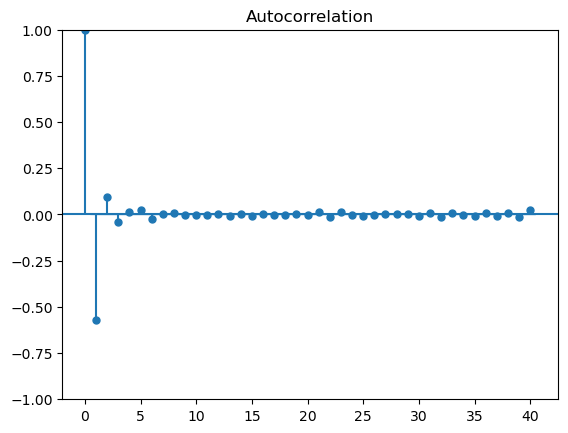

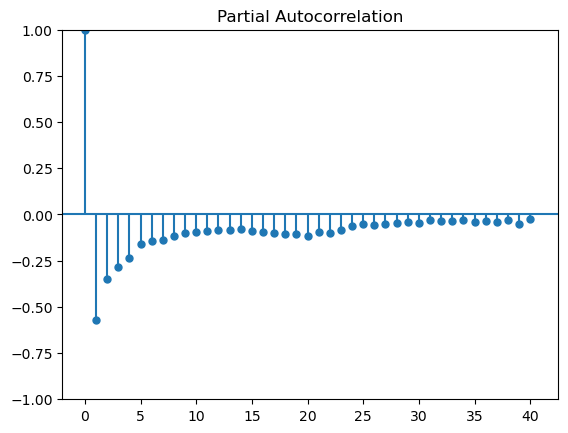

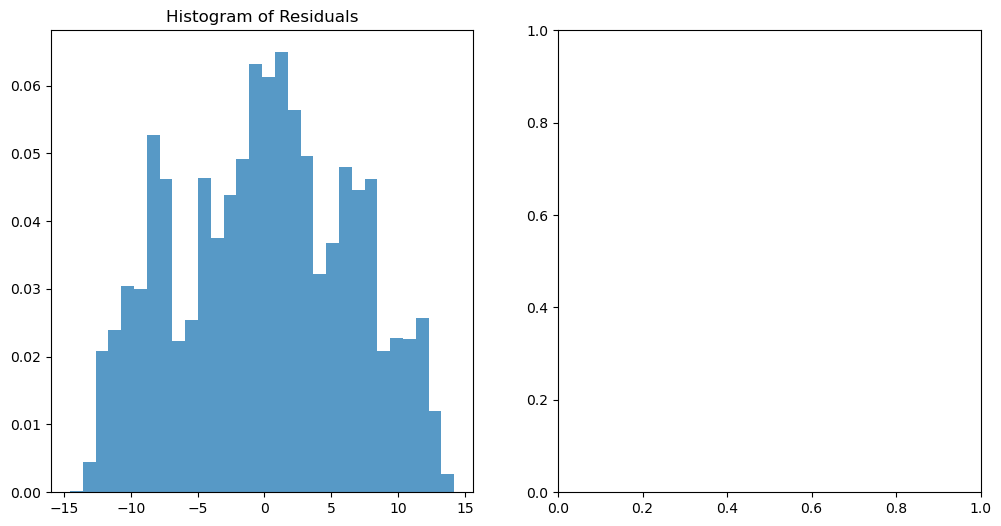

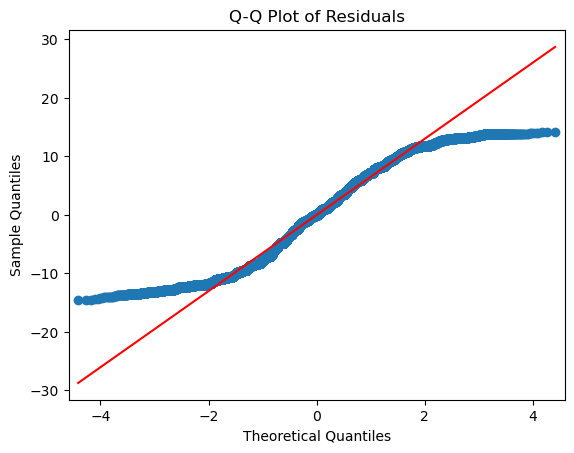

                               SARIMAX Results                                
Dep. Variable:          Booking Class   No. Observations:               195774
Model:                 ARIMA(2, 1, 2)   Log Likelihood             -644530.330
Date:                Sat, 25 Nov 2023   AIC                        1289070.661
Time:                        15:25:04   BIC                        1289121.584
Sample:                             0   HQIC                       1289085.663
                             - 195774                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1288      0.051    -22.170      0.000      -1.229      -1.029
ar.L2         -0.1744      0.009    -19.482      0.000      -0.192      -0.157
ma.L1         -0.0536      0.051     -1.051      0.2

In [26]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Assuming your time series is in a variable called 'time_series'
# Replace 'column_name' with the actual name of your time series column

time_series = Data_12month_booking['Booking Class']

# Step 1: Check Stationarity
# Perform differencing if needed
d = 1
time_series_diff = time_series.diff(d).dropna()

# Step 2: Plot ACF and PACF
plot_acf(time_series_diff, lags=40)
plot_pacf(time_series_diff, lags=40)
plt.show()

# Step 3: Identify p and q
# Based on the plots, identify potential values for p and q

# Step 4: Model Fitting
p = 2  # Replace with identified p value
q = 2  # Replace with identified q value
model = sm.tsa.ARIMA(time_series, order=(p, d, q))
fit_model = model.fit()

# Residual Analysis
residuals = fit_model.resid
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(residuals, bins=30, density=True, alpha=0.75)
plt.title('Histogram of Residuals')

plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Step 5: Choose the Best Model
print(fit_model.summary())

In [38]:
import itertools

p=d=q=range(0,10)
pdq = list(itertools.product(p,d,q))

best_aic = float('inf')
best_order = None


for param in pdq:
    try:
        model_arima = sm.tsa.ARIMA(y_train, order=param)
        model_arima_fit = model_arima.fit(tol=1e-6)
        aic = model_arima_fit.aic
        if aic < best_aic:
            best_aic = aic
            best_order = param
            print(model_arima_fit.summary())
    except Exception as e:
        continue

    
print(best_order, best_aic)        

None inf


In [20]:
import itertools

p = d = q = range(0, 3)  # Adjust the range as needed
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

best_aic = float('inf')
best_order = None
best_seasonal_order = None

# Grid search for SARIMA parameters
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model_sarima = sm.tsa.SARIMAX(y_train, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            model_sarima_fit = model_sarima.fit()
            aic = model_sarima_fit.aic
            if aic < best_aic:
                best_aic = aic
                best_order = param
                best_seasonal_order = param_seasonal
                print(model_sarima_fit.summary())
        except Exception as e:
            continue

print("Best SARIMA Order:", best_order)
print("Best Seasonal Order:", best_seasonal_order)
print("Best AIC:", best_aic)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.69073D+00    |proj g|=  8.26006D-09

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   8.260D-09   7.691D+00
  F =   7.6907307358710399     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                  SARIMAX Results                                   
Dep. Variable:      Booking Class Fare USD    No. Observations:               195774
Model:                  

 This problem is unconstrained.



At iterate    5    f=  7.54564D+00    |proj g|=  1.43731D-03

At iterate   10    f=  7.54538D+00    |proj g|=  2.64410D-02

At iterate   15    f=  7.52637D+00    |proj g|=  1.65428D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     19     23      1     0     0   2.853D-06   7.520D+00
  F =   7.5195415428096064     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                  SARIMAX Results                                   
Dep. Variable:      Booking Class Fare USD    No. Observations:               195774
Model:               SARIMAX(0, 0, [1], 12)   Log Likelihood       

 This problem is unconstrained.



At iterate    5    f=  7.49010D+00    |proj g|=  5.31950D-03

At iterate   10    f=  7.49007D+00    |proj g|=  3.11372D-03

At iterate   15    f=  7.48849D+00    |proj g|=  4.17680D-02

At iterate   20    f=  7.44914D+00    |proj g|=  1.39022D-01

At iterate   25    f=  7.43483D+00    |proj g|=  3.28962D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     28      1     0     0   3.290D-05   7.435D+00
  F =   7.4348321331668465     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                   SARIMAX Results                                   
Dep. Variable:       Bookin

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.14654D+00    |proj g|=  2.77354D-01

At iterate    5    f=  7.09455D+00    |proj g|=  4.12946D-03

At iterate   10    f=  7.09454D+00    |proj g|=  7.26230D-03

At iterate   15    f=  7.09433D+00    |proj g|=  8.27813D-02

At iterate   20    f=  7.08858D+00    |proj g|=  2.44955D-01

At iterate   25    f=  7.07675D+00    |proj g|=  1.29937D-03


KeyboardInterrupt: 

SARIMAX(0, 1, [1], 12)

Final Work of the generation and testing using SARIMAX model.

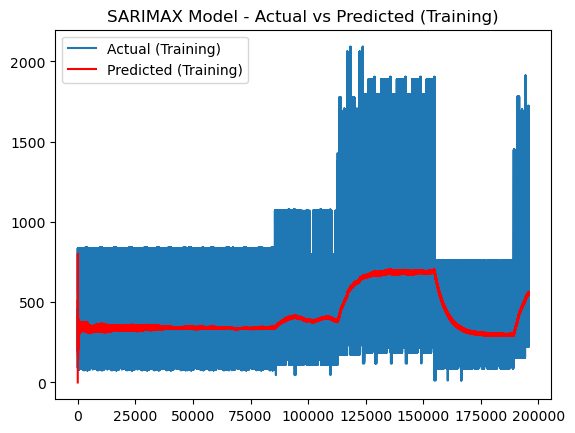

In [23]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Fit SARIMAX model
p = 0
q = 1
d = 1
P = 0
D = 1
Q = 1
s = 12
order = (p, d, q)
seasonal_order = (P, D, Q, s)

model_sarimax = sm.tsa.SARIMAX(y_train, order=order, seasonal_order=seasonal_order)
fit_model_sarimax = model_sarimax.fit(disp=False)

# Make predictions on the training set for illustration
predictions_train_sarimax = fit_model_sarimax.predict()

# Plot actual vs predicted values
plt.plot(y_train, label='Actual (Training)')
plt.plot(predictions_train_sarimax, label='Predicted (Training)', color='red')
plt.title('SARIMAX Model - Actual vs Predicted (Training)')
plt.legend()
plt.show()

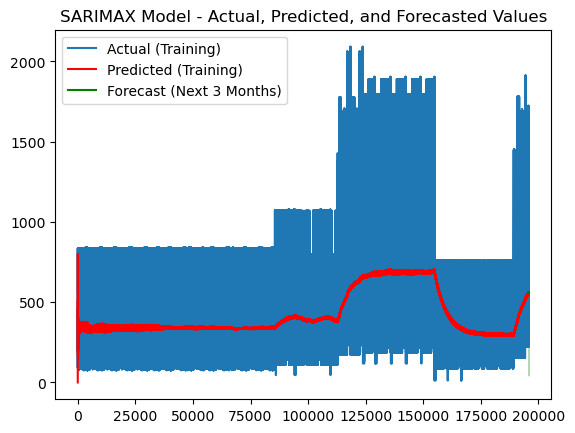

In [24]:
# Forecast next 3 months
forecast_steps_sarimax = 3
forecast_sarimax = fit_model_sarimax.get_forecast(steps=forecast_steps_sarimax)

# Access predicted values and confidence intervals
forecast_values_sarimax = forecast_sarimax.predicted_mean
confidence_intervals_sarimax = forecast_sarimax.conf_int()

# Plot forecast
plt.plot(y_train, label='Actual (Training)')
plt.plot(predictions_train_sarimax, label='Predicted (Training)', color='red')
plt.plot(forecast_values_sarimax.index, forecast_values_sarimax, label='Forecast (Next 3 Months)', color='green')
plt.fill_between(confidence_intervals_sarimax.index, confidence_intervals_sarimax.iloc[:, 0], confidence_intervals_sarimax.iloc[:, 1], color='green', alpha=0.3)
plt.title('SARIMAX Model - Actual, Predicted, and Forecasted Values')
plt.legend()
plt.show()

# Make predictions on the test set
predictions_test_sarimax = fit_model_sarimax.forecast(steps=len(X_test))

# Evaluate the model on the test set
mse_test_sarimax = mean_squared_error(y_test, predictions_test_sarimax)
rmse_test_sarimax = np.sqrt(mse_test_sarimax)
mae_test_sarimax = mean_absolute_error(y_test, predictions_test_sarimax)

Test Set Metrics:
Mean Squared Error (MSE): 125295.84902717997
Root Mean Squared Error (RMSE): 353.9715370297165
Mean Absolute Error (MAE): 292.12344556888377


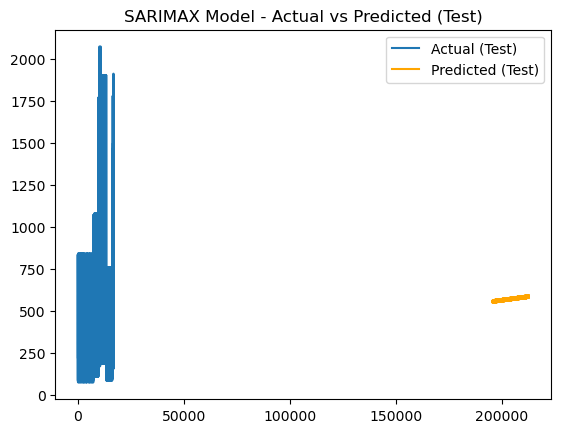

In [25]:
print(f"Test Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_test_sarimax}")
print(f"Root Mean Squared Error (RMSE): {rmse_test_sarimax}")
print(f"Mean Absolute Error (MAE): {mae_test_sarimax}")

# Plot actual vs predicted values for the test set
plt.plot(y_test, label='Actual (Test)')
plt.plot(predictions_test_sarimax, label='Predicted (Test)', color='orange')
plt.title('SARIMAX Model - Actual vs Predicted (Test)')
plt.legend()
plt.show()